<a href="https://colab.research.google.com/github/ankalagigaurave/Big-Data-Labs/blob/main/Labs/Dask_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Packages

In [ ]:
import multiprocessing 
import os
from time import sleep

import dask
import dask.dataframe as dd
from dask import delayed
from dask.distributed import Client

import concurrent

import pandas as pd
import time
import numpy as np

import multiprocessing
multiprocessing.cpu_count()

4

## MultiProcessing

In [ ]:
# Print Cube Of Number
def print_cube(num): 
    print(os.getpid())
    print("Cube: {}".format(num * num * num)) 

# Print Suqare Of Number
def print_square(num): 
    print(os.getpid())
    print("Square: {}".format(num * num)) 

if __name__ == "__main__": 
    # creating processes 
    p1 = multiprocessing.Process(target=print_square, args=(10, )) 
    p2 = multiprocessing.Process(target=print_cube, args=(10, )) 

    # Starting process 1 
    p1.start() 
    # Starting process 2 
    p2.start() 

    # Wait until process 1 is finished 
    p1.join() 
    # Wait until process 2 is finished 
    p2.join() 

    # Both Processes Finished 
    print("Done!") 

Done!


In [ ]:
def apply_discount(x):
    sleep(1)
    x = x - 0.3*x
    return x

def get_total(a,b):
    sleep(1)
    return a+b

def total_price(x,y):
    sleep(1)
    a = apply_discount(x)
    b = apply_discount(y)
    print(get_total(a,b))

In [ ]:
%%time
a = apply_discount(1000)
b = apply_discount(1000)
get_total(a,b)

CPU times: user 943 µs, sys: 1.44 ms, total: 2.38 ms
Wall time: 3.01 s


1400.0

## Dask Visualizations

In [ ]:
x = delayed(apply_discount)(1000)
y = delayed(apply_discount)(4000)
z = delayed(total_price)(x, y)

z.compute()

2450.0


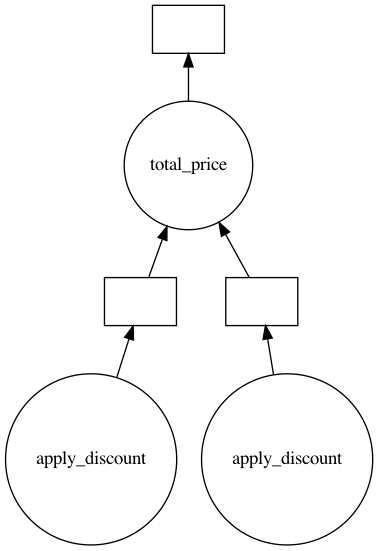

In [ ]:
z.visualize()

In [ ]:
# Return Square Of Number
def square(x):
    return x*x

# Return Double Of Number
def double(x):
    return x*2

# Add Two Numbers
def add(x, y):
    return x + y

# For loop that calls the above functions for each data
output = []
for i in range(6):
    a = delayed(square)(i)
    b = delayed(double)(i)
    c = delayed(add)(a, b)
    output.append(c)

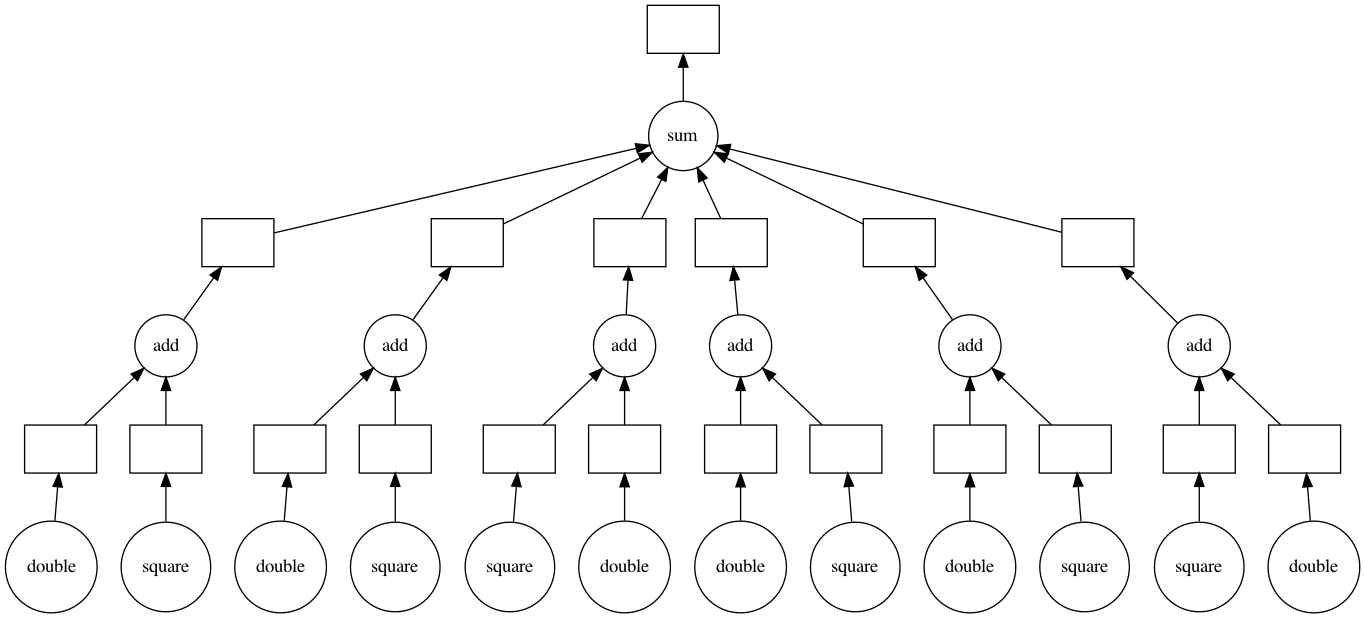

In [ ]:
total = delayed(sum)(output)
total.visualize()

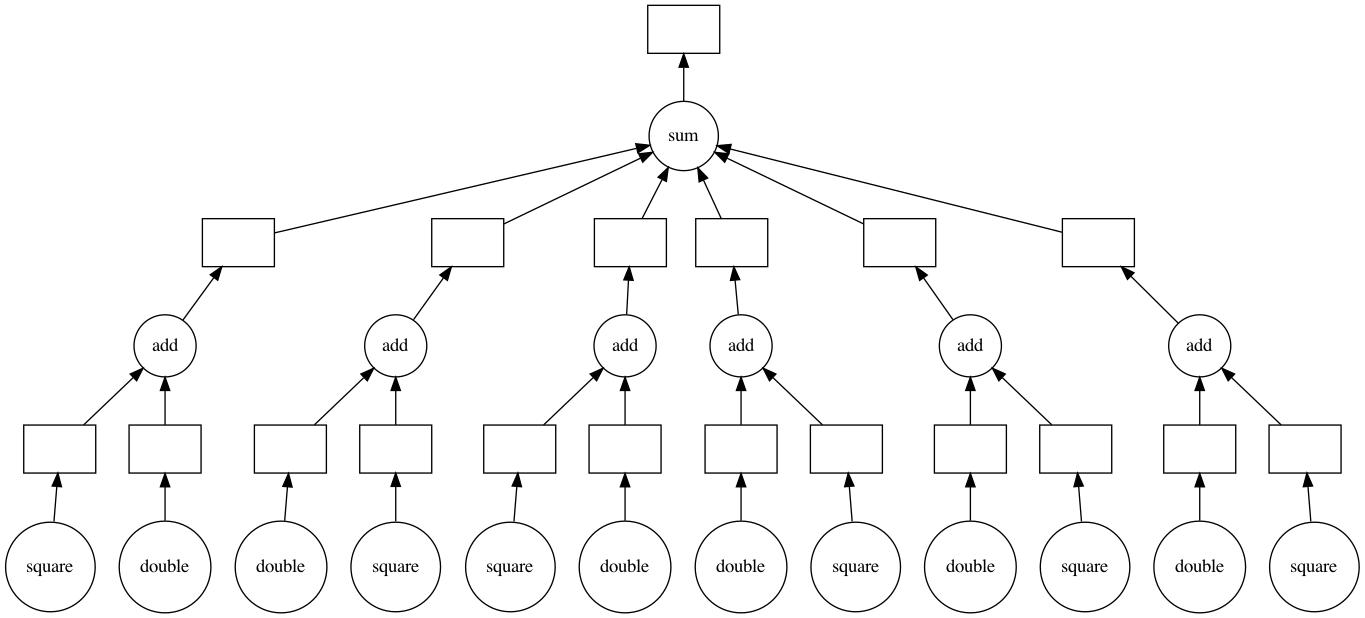

In [ ]:
# Functions to perform mathematics operations
@delayed
def square(x):
    return x*x
@delayed
def double(x):
    return x*2
@delayed
def add(x, y):
    return x + y

# For loop that calls the above functions for each data
output = []
for i in range(6):
    a = square(i)
    b = double(i)
    c = add(a, b)
    output.append(c)

total = delayed(sum)(output)
total.visualize()

## Dask

In [ ]:
dask.__version__

'2.30.0'

### Loading Already Available Data

In [ ]:
df = dask.datasets.timeseries()
df

,id,name,x,y
npartitions=30,,,,
2000-01-01,int64,object,float64,float64
2000-01-02,...,...,...,...
...,...,...,...,...
2000-01-30,...,...,...,...
2000-01-31,...,...,...,...


In [ ]:
df.head()

,id,name,x,y
timestamp,,,,
2000-01-01 00:00:00,1077,Ingrid,-0.544829,0.776003
2000-01-01 00:00:01,1038,Edith,-0.237737,-0.092084
2000-01-01 00:00:02,1016,Victor,0.541848,0.330316
2000-01-01 00:00:03,1009,Hannah,0.698170,-0.644270
2000-01-01 00:00:04,973,Yvonne,0.638689,0.840168


### Group By Functions and Computations Of Dask

In [ ]:
df1 = df.groupby('name').y.std()
df1

Dask Series Structure:
npartitions=1
    float64
        ...
Name: y, dtype: float64
Dask Name: sqrt, 67 tasks

In [ ]:
df1.compute()

name
Alice       0.576833
Bob         0.577553
Charlie     0.575747
Dan         0.578563
Edith       0.576382
Frank       0.577001
George      0.576998
Hannah      0.577574
Ingrid      0.577055
Jerry       0.576864
Kevin       0.577910
Laura       0.577726
Michael     0.577174
Norbert     0.577692
Oliver      0.577606
Patricia    0.576781
Quinn       0.579065
Ray         0.576822
Sarah       0.576495
Tim         0.576038
Ursula      0.577516
Victor      0.576078
Wendy       0.577067
Xavier      0.577461
Yvonne      0.577499
Zelda       0.577945
Name: y, dtype: float64

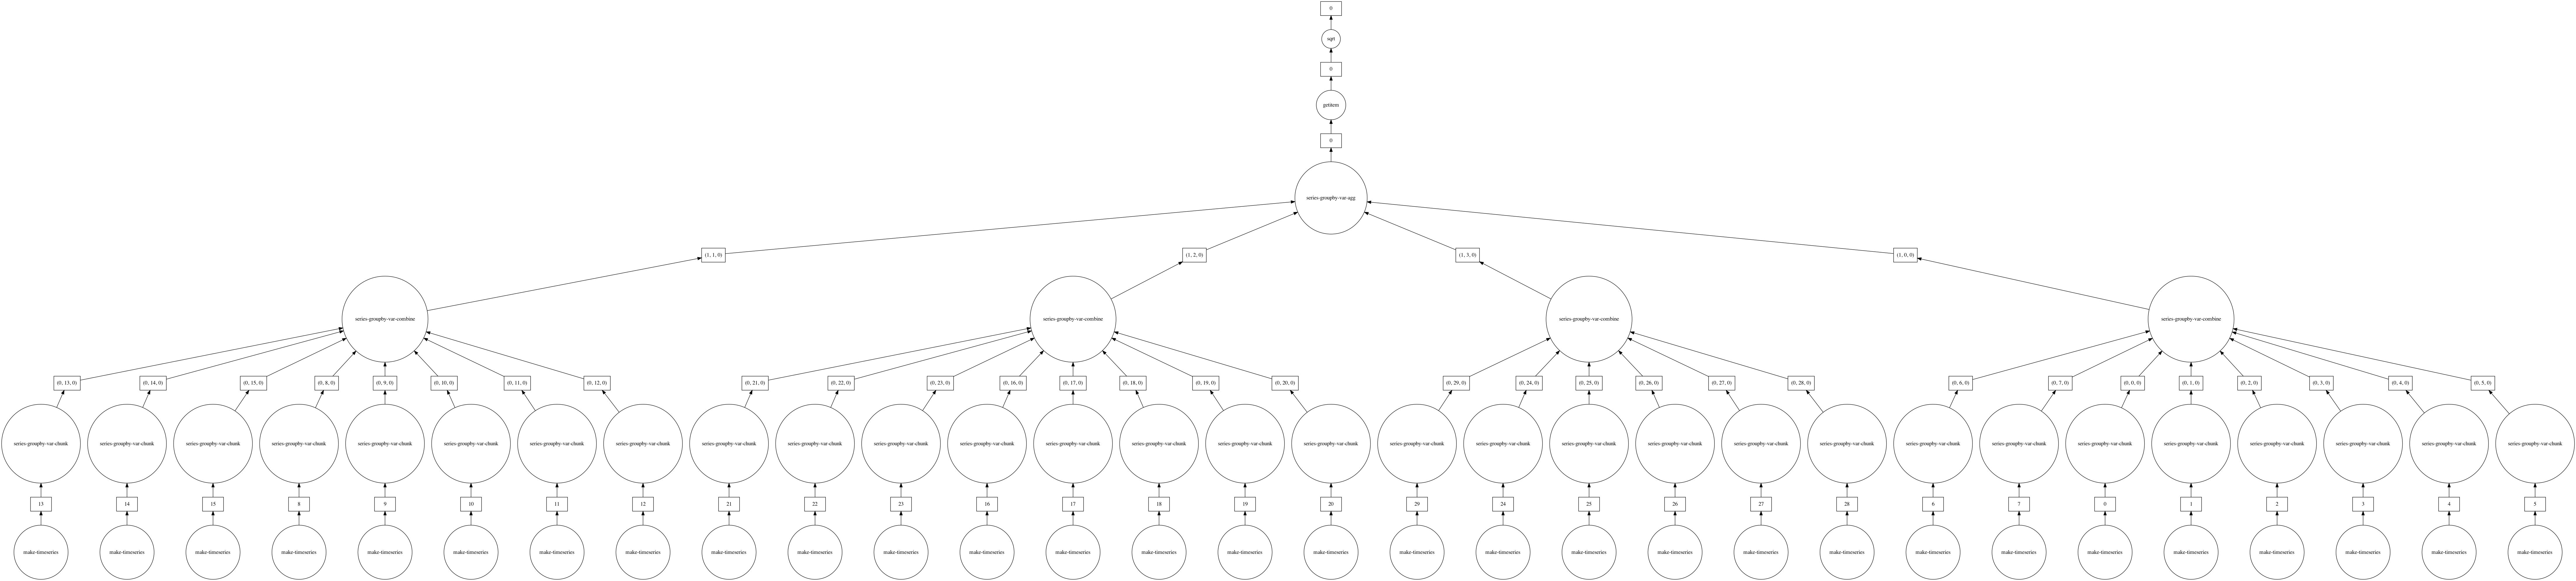

In [ ]:
df1.visualize()

In [ ]:
%time
df.loc['2000-01-01']

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.91 µs


,id,name,x,y
npartitions=1,,,,
2000-01-01 00:00:00.000000000,int64,object,float64,float64
2000-01-01 23:59:59.999999999,...,...,...,...


In [ ]:
df = df.persist()

In [ ]:
%time
df.loc['2000-01-01'].compute()

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.87 µs


,id,name,x,y
timestamp,,,,
2000-01-01 00:00:00,1077,Ingrid,-0.544829,0.776003
2000-01-01 00:00:01,1038,Edith,-0.237737,-0.092084
2000-01-01 00:00:02,1016,Victor,0.541848,0.330316
2000-01-01 00:00:03,1009,Hannah,0.698170,-0.644270
2000-01-01 00:00:04,973,Yvonne,0.638689,0.840168
...,...,...,...,...
2000-01-01 23:59:55,985,Sarah,-0.504111,-0.225815
2000-01-01 23:59:56,941,Dan,-0.669921,-0.230532
2000-01-01 23:59:57,983,Dan,0.666935,-0.204478


In [ ]:
dask_bag = dask.bag.from_sequence(['I', 'am', 'learning', 'dask'], partition_size = 2)

dask_bag.visualize() #--->[0] [1]

AttributeError: module 'dask' has no attribute 'bag'

### Visualizing With Dask Dataframe

<AxesSubplot:xlabel='timestamp'>

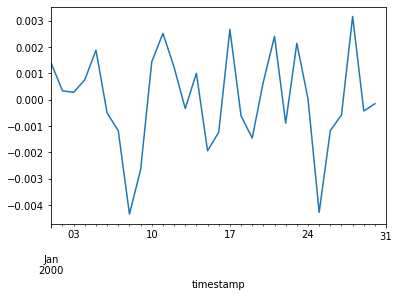

In [ ]:
%matplotlib inline
df['y'].resample('24h').mean().compute().plot()

In [ ]:
len(df)

2592000

## Comparing Pandas Dataframe and Dask Dataframe

In [ ]:
client = Client(processes = False)
client

Client Scheduler: inproc://192.168.1.6/36629/1 Dashboard: http://192.168.1.6:8787/status,Cluster Workers: 1 Cores: 4 Memory: 8.59 GB


### Pandas DataFrame

In [ ]:
df = pd.DataFrame(np.random.random(size=(10000000, 4)),
                            columns=['param_a', 'param_b', 'param_c', 'param_d'])
df.head()

,param_a,param_b,param_c,param_d
0,0.234845,0.163756,0.510203,0.700452
1,0.148294,0.849834,0.942912,0.042038
2,0.744165,0.631248,0.986553,0.686511
3,0.342280,0.586407,0.257177,0.483185
4,0.240985,0.684398,0.477910,0.631988


In [ ]:
def costly_simulation(list_param):
    time.sleep(3)
    return sum(list_param)

In [ ]:
%%time
results = []
for col in df.columns:
    result = costly_simulation(df[col].values)
    results.append(result)

CPU times: user 8.14 s, sys: 216 ms, total: 8.36 s
Wall time: 21.2 s


In [ ]:
results

[4998723.835201808, 4999656.103086711, 5000166.045225786, 4999723.592850856]

### Dask DataFrame

In [ ]:
%%time
results = []
for col in df.columns:
    result =dask.delayed(costly_simulation)(df[col].values)
    results.append(result)

CPU times: user 2.32 ms, sys: 1.84 ms, total: 4.17 ms
Wall time: 31.6 ms


In [ ]:
results[0]

Delayed('costly_simulation-e29fc367-7206-4cbb-a875-62fd986d4d9e')

In [ ]:
%time dask.compute(*results)

/Users/nmims/opt/anaconda3/lib/python3.8/site-packages/distributed/worker.py:3373: UserWarning: Large object of size 80.00 MB detected in task graph: 
  (array([0.23484547, 0.14829397, 0.74416531, ..., 0 ...  0.55166232]),)
Consider scattering large objects ahead of time
with client.scatter to reduce scheduler burden and 
keep data on workers

    future = client.submit(func, big_data)    # bad

    big_future = client.scatter(big_data)     # good
    future = client.submit(func, big_future)  # good
  warnings.warn(


CPU times: user 10 s, sys: 1.07 s, total: 11.1 s
Wall time: 24.2 s


(4998723.835201808, 4999656.103086711, 5000166.045225786, 4999723.592850856)